In [2]:
# import the required packages
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, cross_validate 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from xgboost import XGBClassifier
import nltk
import string
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import time

## 1. Text Data Preprocessing

### 1.1 Load the Text Data

In [3]:
dat = pd.read_csv('bbc-text.csv')

In [4]:
dat.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
dat.shape

(2225, 2)

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [7]:
dat['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### 1.2 Cleanse the Text Data

In [4]:
def clean(text):
    stopwords=get_stop_words("stopwords(1).txt") #get stopwords from file
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation
    tokens = re.split("\d|\W+", text) #remove whitespaces + special characters
    wn = nltk.WordNetLemmatizer()
    text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopwords and wn.lemmatize(word) != ""]) #lemmatize words
    return text

def get_stop_words(file_path): #read all stopwords from file and save as frozenset
    """load stop words """
    
    with open(file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)

text_cleaned = dat['text'].apply(lambda x:clean(x)) #apply cleaning formula to all text in dataset

In [10]:
text_cleaned[0]

'tv future hand viewer home theatre system plasma highdefinition tv digital video recorder moving living people watch tv radically five time according expert panel gathered annual consumer electronics la vega discus technology impact favourite pastime leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front portable device talkedabout technology ce digital personal video recorder dvr pvr settop box tivo uk sky system allow people record store play pause forward wind tv programme essentially technology allows personalised tv builtin highdefinition tv set business japan slower europe lack highdefinition programming people forward wind advert forget abiding network channel schedule putting own alacarte entertainment network cable satellite company worried mean term advertising revenue brand identity viewer loyalty channel lead technology moment concern raised europe particularly growing uptake service sky happens ni

### 1.3 Bag-of-Word

In [5]:
stopwords = get_stop_words("stopwords(1).txt")
count_vect = CountVectorizer(max_df=0.15, stop_words=stopwords) #initialise Bag of Words vector and remove stopwords
text_count = count_vect.fit_transform(text_cleaned) #fit cleaned text into Bag of Words

In [15]:
stopwords

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'among',
           'an',
           'and',
           'another',
           'any',
           'anybody',
           'anyone',
           'anything',
           'anywhere',
           'are',
           'area',
           'areas',
           'around',
           'as',
           'ask',
           'asked',
           'asking',
           'asks',
           'at',
           'away',
           'b',
           'back',
           'backed',
           'backing',
           'backs',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'been',
           'before',
           'began',
           'behind',
           'being',
  

In [16]:
text_count.shape

(2225, 26906)

In [6]:
feature_names=np.array(count_vect.get_feature_names())
count_vect.get_feature_names()

['aa',
 'aaa',
 'aac',
 'aadc',
 'aaliyah',
 'aaltra',
 'aamir',
 'aan',
 'aara',
 'aarhus',
 'aaron',
 'abacus',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abate',
 'abatement',
 'abating',
 'abba',
 'abbas',
 'abbasi',
 'abbey',
 'abbot',
 'abbott',
 'abbreviated',
 'abc',
 'abd',
 'abdellatif',
 'abdication',
 'abdomen',
 'abdominal',
 'abducted',
 'abduction',
 'abdul',
 'abdullah',
 'abdullatif',
 'abebe',
 'abensur',
 'aberavon',
 'aberdeen',
 'aberdeenbased',
 'aberration',
 'aberystwyth',
 'abetting',
 'abeyance',
 'abeyie',
 'abhorrent',
 'abi',
 'abide',
 'abided',
 'abiding',
 'abigail',
 'ability',
 'abishuly',
 'abiyote',
 'able',
 'ablebodied',
 'abn',
 'abnormal',
 'abnormality',
 'abolish',
 'abolished',
 'abolishing',
 'abolition',
 'aborted',
 'abortion',
 'abortionist',
 'abortive',
 'aboutroughly',
 'aboveaverage',
 'abraham',
 'abramovich',
 'abroad',
 'abruptly',
 'absa',
 'absence',
 'absent',
 'absentee',
 'absolute',
 'absolutely',
 'absolution'

In [18]:
pd.DataFrame(text_count.toarray(), columns=feature_names)

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aan,aara,aarhus,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.4 TF-IDF

In [6]:
tfidf = TfidfTransformer(smooth_idf=True, use_idf=True) #initialise TF-IDF vector
text_tfidf = tfidf.fit_transform(text_count) #fit Bag of Words into TF-IDF vector

In [20]:
tfidf.idf_.shape

(26906,)

In [10]:
sorted_by_idf = np.argsort(tfidf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))
print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_idf[-100:]]))

Features with lowest idf:
['according' 'move' 'help' 'public' 'bn' 'director' 'report' 'sale' 'six'
 'third' 'international' 'record' 'don' 'issue' 'business' 'british'
 'look' 'start' 'despite' 'decision' 'mean' 'life' 'cost' 'change'
 'london' 'european' 'film' 'future' 'result' 'seen' 'money' 'figure'
 'spokesman' 'lot' 'deal' 'claim' 'executive' 'analyst' 'run' 'industry'
 'earlier' 'star' 'called' 'party' 'britain' 'share' 'saying' 'taking'
 'action' 'system' 'national' 'able' 'yearold' 'hope' 'due' 'europe'
 'team' 'leader' 'lost' 'recent' 'england' 'past' 'technology' 'biggest'
 'found' 'office' 'labour' 'chance' 'music' 'level' 'following' 'offer'
 'january' 'website' 'programme' 'price' 'looking' 'job' 'major' 'final'
 'strong' 'growth' 'using' 'believe' 'cut' 'election' 'ahead' 'michael'
 'currently' 'nation' 'return' 'rise' 'support' 'real' 'played' 'held'
 'current' 'role' 'december' 'key']
Features with highest tfidf: 
['jussi' 'justfor' 'justifies' 'josserand' 'josephdesi

In [20]:
pd.DataFrame(text_tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,26896,26897,26898,26899,26900,26901,26902,26903,26904,26905
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Text Data Understanding

### 2.1 Extract keywords using TF-IDF matrix

In [8]:
idx=0
doc=text_cleaned[idx]
topn=10
tfidf_results=[]

for idx,doc in text_cleaned.items():
    #generate tf-idf for the given document
    text_tfidf_vector=text_tfidf[idx]
    
    #group features and their corresponding tf-idf scores together; sorted by tf-idf scores in descending order
    temp = pd.DataFrame(zip(text_tfidf_vector.tocoo().col, text_tfidf_vector.tocoo().data),columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending=False, inplace=True)
    
    #use only topn items from vector
    topn_items = temp[:topn]

    tf_idf = []
    word = []
    
    #zip topn items into dictionary, append dictionary into list
    for index, row in topn_items.iterrows():
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        tf_idf.append(round(row['tf_idf'], 3))

    result = dict(zip(word, tf_idf))
    
    tfidf_results.append(result)

tfidf_results

[{'tv': 0.384,
  'dvr': 0.247,
  'brand': 0.224,
  'hanlon': 0.195,
  'channel': 0.176,
  'highdefinition': 0.173,
  'tivo': 0.161,
  'viewer': 0.149,
  'network': 0.145,
  'watch': 0.142},
 {'worldcom': 0.47,
  'ebbers': 0.431,
  'myers': 0.342,
  'accounting': 0.268,
  'weingarten': 0.145,
  'fraud': 0.137,
  'lawyer': 0.127,
  'defence': 0.125,
  'bn': 0.115,
  'witness': 0.115},
 {'farrell': 0.54,
  'gamble': 0.319,
  'leicester': 0.245,
  'rugby': 0.217,
  'league': 0.199,
  'tiger': 0.19,
  'union': 0.183,
  'knee': 0.172,
  'andy': 0.139,
  'involved': 0.127},
 {'yeading': 0.296,
  'west': 0.156,
  'nonleague': 0.148,
  'scunthorpe': 0.148,
  'watford': 0.141,
  'cup': 0.137,
  'plymouth': 0.135,
  'ipswich': 0.135,
  'united': 0.133,
  'drawn': 0.133},
 {'ocean': 0.372,
  'sequel': 0.327,
  'twelve': 0.231,
  'soderbergh': 0.189,
  'clooney': 0.182,
  'starring': 0.173,
  'pitt': 0.164,
  'eleven': 0.164,
  'box': 0.152,
  'office': 0.12},
 {'howard': 0.462,
  'mongrel': 0.267,

### 2.2 Association Rules Mining on keywords

In [10]:
#encode top 10 keywords
te = TransactionEncoder()
text_encoded = te.fit_transform(tfidf_results)
text_encoded = pd.DataFrame(text_encoded, columns = te.columns_)
text_encoded

,aaa,aadc,aaliyah,abandoned,abba,abbas,abbasi,abc,aberdeen,able,...,zero,zib,zidane,zimbabwe,zombic,zombie,zone,zornotza,zorro,zvonareva
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2221,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2222,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2223,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
frequent_itemsets=apriori(text_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.010787,(actor)
1,0.012584,(airline)
2,0.015281,(album)
3,0.011236,(arsenal)
4,0.010337,(australian)
...,...,...
101,0.010787,"(tory, howard)"
102,0.011685,"(party, labour)"
103,0.011236,"(tory, labour)"
104,0.014831,"(phone, mobile)"


In [11]:
high_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
high_confidence.sort_values('confidence', ascending = False, inplace = True)
high_confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(chancellor),(brown),0.014831,0.025618,0.011685,0.787879,30.754918,0.011305,4.593515
12,(howard),(tory),0.016629,0.026517,0.010787,0.648649,24.461750,0.010346,2.770683
18,(mobile),(phone),0.023371,0.023371,0.014831,0.634615,27.154216,0.014285,2.672880
17,(phone),(mobile),0.023371,0.023371,0.014831,0.634615,27.154216,0.014285,2.672880
5,(brown),(labour),0.025618,0.036854,0.012584,0.491228,13.329054,0.011640,1.893080
8,(election),(labour),0.035506,0.036854,0.017079,0.481013,13.051868,0.015770,1.855818
7,(labour),(election),0.036854,0.035506,0.017079,0.463415,13.051868,0.015770,1.797467
3,(brown),(chancellor),0.025618,0.014831,0.011685,0.456140,30.754918,0.011305,1.811439
0,(award),(film),0.034157,0.057079,0.015281,0.447368,7.837754,0.013331,1.706239
9,(party),(election),0.028764,0.035506,0.012584,0.437500,12.321994,0.011563,1.714657


In [25]:
high_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
high_lift.sort_values('lift', ascending = False, inplace = True)
high_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(chancellor),(brown),0.014831,0.025618,0.011685,0.787879,30.754918,0.011305,4.593515
4,(brown),(chancellor),0.025618,0.014831,0.011685,0.456140,30.754918,0.011305,1.811439
19,(mobile),(phone),0.023371,0.023371,0.014831,0.634615,27.154216,0.014285,2.672880
18,(phone),(mobile),0.023371,0.023371,0.014831,0.634615,27.154216,0.014285,2.672880
13,(tory),(howard),0.026517,0.016629,0.010787,0.406780,24.461750,0.010346,1.657682
12,(howard),(tory),0.016629,0.026517,0.010787,0.648649,24.461750,0.010346,2.770683
21,(tory),(party),0.026517,0.028764,0.010337,0.389831,13.552701,0.009574,1.591748
20,(party),(tory),0.028764,0.026517,0.010337,0.359375,13.552701,0.009574,1.519583
6,(labour),(brown),0.036854,0.025618,0.012584,0.341463,13.329054,0.011640,1.479617
7,(brown),(labour),0.025618,0.036854,0.012584,0.491228,13.329054,0.011640,1.893080


### 2.3 Most Popular Categories

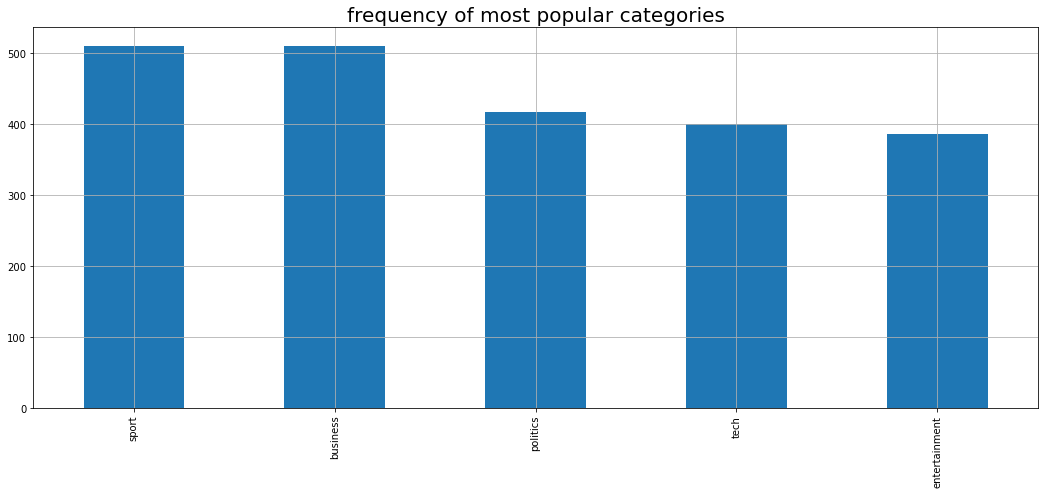

In [5]:
plt.figure(figsize=(18,7))
dat['category'].value_counts().plot.bar()
plt.title('frequency of most popular categories', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

### 2.4 Word Clouds

In [12]:
dat['cleaned_text'] = text_cleaned #create new column in dataset to store cleaned text

In [13]:
pd.set_option("max_colwidth", 1000)
dat_grouped = pd.DataFrame(dat.groupby('category')['cleaned_text']) #group cleaned text column by category
dat_grouped.head()

,0,1
0,business,1 worldcom bos left book former worldcom bos bernie ebbers accused overseeing bn bn fraud accounting decision witness told juror david myers comment questioning defence lawyer arguing ebbers responsible worldcom phone company collapsed prosecutor claim loss hidden protect firm share myers pleaded guilty fraud assisting prosecutor monday defence lawyer reid weingarten tried distance client allegation cross examination myers ebbers accounting decision am aware myers replied ebbers accounting entry worldcom book weingarten pressed replied witness myers admitted false accounting entry request former worldcom chief financial officer scott sullivan defence lawyer trying paint sullivan admitted fraud testify trial mastermind worldcom accounting house card ebbers team meanwhile looking portray affable bos own admission pe graduate economist whatever ability ebbers transformed worldcom relative unknown bn telecom giant investor darling late worldcom mounted competition increased telec...
1,entertainment,4 ocean twelve raid box office ocean twelve crime caper sequel starring george clooney brad pitt julia robert gone straight box office chart weekend ticket sale according studio estimate sequel follows master criminal try pull major heist europe knocked week national treasure third wesley snipe blade trinity taking rounding top five animated fable polar express starring tom hank festive comedy christmas kranks ocean twelve box office triumph mark fourthbiggest december release film lord ring trilogy sequel narrowly beat predecessor ocean eleven weekend total remake film starring frank sinatra rat pack ocean eleven directed oscarwinning director steven soderbergh soderbergh return direct hit sequel reunites clooney pitt robert matt damon andy garcia elliott gould catherine zetajones join allstar cast fun holiday movie dan fellman president distribution warner bros critic complimentary project los angeles time labelling dispiriting vanity project milder review york time dubbed ...
2,politics,5 howard hit mongrel jibe michael howard claim peter hain tory leader acting attack mongrel labour rattled opposition upbeat speech party spring conference brighton labour campaigning tactic proved tory hitting home hain claim tory tactic antiterror bill debate tell little bit rattled howard hain leader common told bbc radio programme howard stance government antiterrorism legislation putting country risk accused tory leader behaving attack mongrel playing opposition opposition sake howard told party labour claim cling office cost compared fagin shylock flying pig morning peter hain called mongrel don tell little bit rattled environment secretary margaret beckett rejected howard comment telling radio pm programme labour rattled real duty try people focus michael howard record proposal trying forward country example seeing believe poor judgement behalf howard tory policy school tax immigration crime striking chord voter beginning election ve political weather told party confer...
3,sport,2 tiger wary farrell gamble leicester rushed bid andy farrell britain rugby league captain decide switch code else involved process stage tiger bos john told bbc radio leicester moment lot unknown andy farrell medical situation whoever gamble farrell persistent knee operation knee five week ago expected month leicester saracen believed head list rugby union club signing farrell decides move game move union belief playing initially step league union involved centre england prefer progress position row rugby league skill forward jury cross divide club balance struck cost gamble option bringing readymade ...
4,tech,0 tv future hand viewer home theatre system plasma highdefinition tv digital video recorder moving living people watch tv radically five time according expert panel gathered annual consumer electronics la vega discus technology impact favourite pastime leading trend programme content delivered viewer via home network cable satellite telecom comp

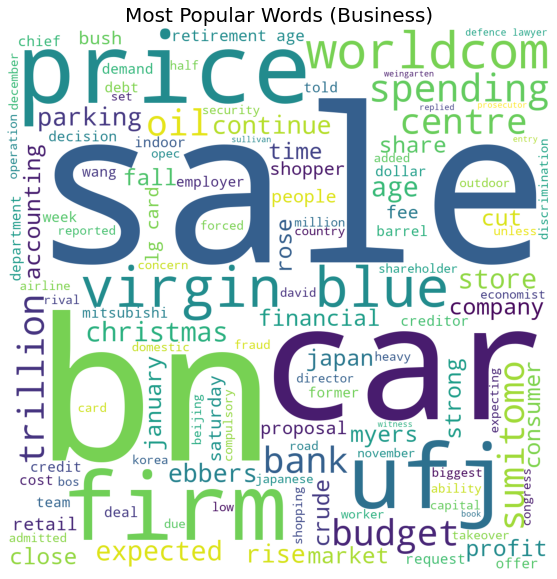

In [59]:
#word cloud for most popular words in business articles
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width=1200,  height=1200, max_words=121).generate(str(dat_grouped[1][0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words (Business)',fontsize = 20)
plt.show()

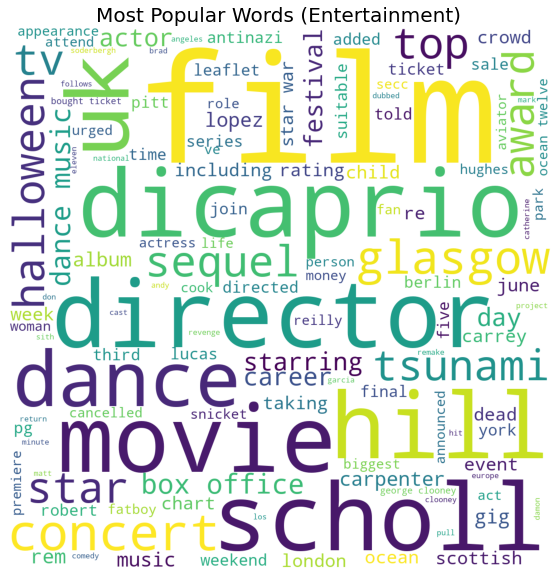

In [16]:
#word cloud for most popular words in entertainment articles
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(dat_grouped[1][1]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words (Entertainment)',fontsize = 20)
plt.show()

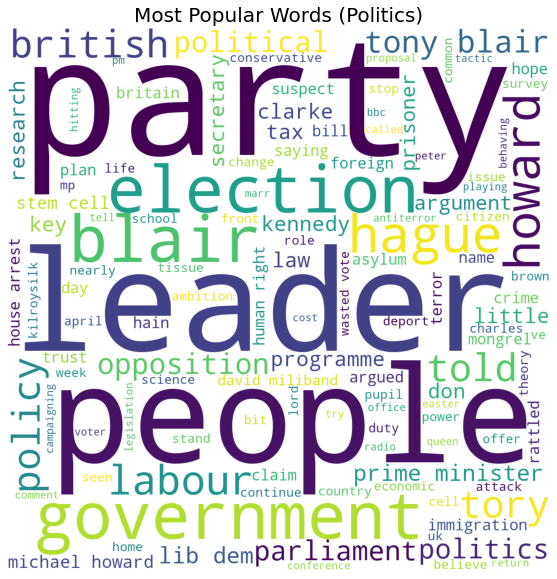

In [62]:
#word cloud for most popular words in political articles
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(dat_grouped[1][2]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words (Politics)',fontsize = 20)
plt.show()

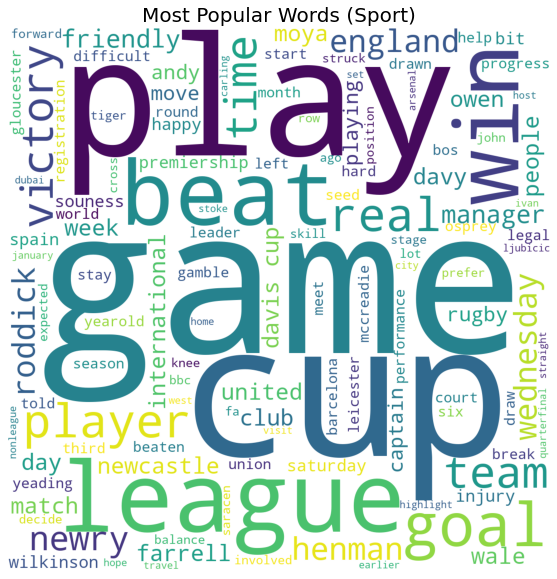

In [64]:
#word cloud for most popular words in sports articles
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(dat_grouped[1][3]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words (Sport)',fontsize = 20)
plt.show()

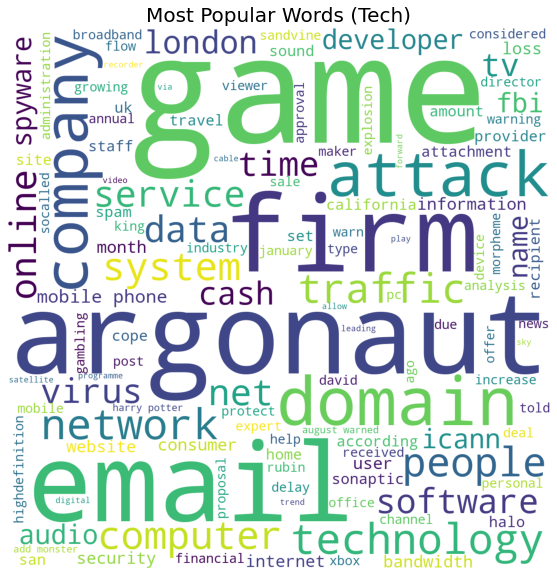

In [65]:
#word cloud for most popular words in tech articles
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(dat_grouped[1][4]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words (Tech)',fontsize = 20)
plt.show()

## 3. Classification Modeling

### 3.1 Sample the data

In [7]:
X = text_count.toarray()

In [8]:
y = dat['category'].map({'business': 0, 'entertainment' : 1, 'politics' : 2,
                        'sport' : 3, 'tech' : 4}).astype(int)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [10]:
X2 = text_tfidf.toarray()

In [11]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=2)

### 3.2 Build the Model(s)

#### Random Forest with Bag of Words input

In [12]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

In [28]:
#cross-validate training set
rf_count_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(rf_count_scores)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(rf_count_scores)))

[0.95512821 0.97435897 0.94855305 0.94212219 0.97106109]
Mean cross-validation accuracy: 0.96


In [13]:
#predict test set
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Final Prediction Accuracy: {}".format(round((y_pred==y_test).sum()/len(y_pred), 3)))

Final Prediction Accuracy: 0.964


#### Random Forest with TF-IDF input

In [29]:
#cross-validate training set
rf_tfidf_scores = cross_val_score(rf, X2_train, y_train, cv=5)
print(rf_tfidf_scores)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(rf_tfidf_scores)))

[0.96474359 0.96474359 0.95819936 0.95176849 0.97106109]
Mean cross-validation accuracy: 0.96


In [23]:
#predict test set
rf.fit(X2_train, y_train)
y2_pred = rf.predict(X2_test)
print("Final Prediction Accuracy: {}".format(round((y2_pred==y_test).sum()/len(y2_pred), 3)))

Final Prediction Accuracy: 0.969


#### Naive Bayes with Bag of Words input

In [24]:
nb = ComplementNB()

In [30]:
#cross-validate training set
nb_count_scores = cross_val_score(nb, X_train, y_train, cv=5)
print(nb_count_scores)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(nb_count_scores)))

[0.95512821 0.98717949 0.96784566 0.97427653 0.98392283]
Mean cross-validation accuracy: 0.97


In [25]:
#predict test set
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Final Prediction Accuracy: {}".format(round((y_pred==y_test).sum()/len(y_pred), 3)))

Final Prediction Accuracy: 0.978


#### Naive Bayes with TF-IDF input

In [31]:
#cross-validate training set
nb_tfidf_scores = cross_val_score(ComplementNB(), X2_train, y_train, cv=5)
print(nb_tfidf_scores)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(nb_tfidf_scores)))

[0.96153846 0.99038462 0.96141479 0.97427653 0.97749196]
Mean cross-validation accuracy: 0.97


In [26]:
#predict test set
nb.fit(X2_train, y_train)
y2_pred = nb.predict(X2_test)
print("Final Prediction Accuracy: {}".format(round((y2_pred==y_test).sum()/len(y2_pred), 3)))

Final Prediction Accuracy: 0.978


#### Gradient Boosting with Bag of Words input

In [56]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=None,verbose=3)

In [29]:
#cross-validate training set
gb_count_scores = cross_val_score(gb, X_train, y_train, cv=5)
print(gb_count_scores)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(gb_count_scores)))

[0.88461538 0.86217949 0.89710611 0.85530547 0.8778135 ]
Mean cross-validation accuracy: 0.88


In [59]:
#predict test set
gb.fit(X_train, y_train)
y_pred=gb.predict(X_test)
print("Final Prediction Accuracy: {}".format(round((y_pred==y_test).sum()/len(y_pred), 3)))

Final Prediction Accuracy: 0.883


#### Gradient Boosting with TF-IDF

In [30]:
#cross-validate training set
gb_tfidf_scores = cross_val_score(gb, X2_train, y_train, cv=5)
print(gb_tfidf_scores)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(gb_tfidf_scores)))

[0.86217949 0.90064103 0.88102894 0.8681672  0.90353698]
Mean cross-validation accuracy: 0.88


In [60]:
#predict test set
gb.fit(X2_train, y_train)
y2_pred = gb.predict(X2_test)
print("Final Prediction Accuracy: {}".format(round((y2_pred==y_test).sum()/len(y2_pred), 3)))

      Iter       Train Loss   Remaining Time 
         1           1.2245          141.86m
         2           0.9777          155.62m
         3           0.7969          158.58m
         4           0.6574          155.98m
         5           0.5465          151.77m
         6           0.4569          148.32m
         7           0.3834          145.57m
         8           0.3227          143.37m
         9           0.2723          141.33m
        10           0.2301          139.30m
        11           0.1948          138.11m
        12           0.1650          138.07m
        13           0.1400          136.83m
        14           0.1188          135.18m
        15           0.1009          133.73m
        16           0.0857          133.84m
        17           0.0729          133.61m
        18           0.0620          132.47m
        19           0.0527          131.66m
        20           0.0449          131.04m
        21           0.0382          129.88m
        2

### 3.3 Evaluate and Improve the Model(s)

#### Test max_df parameter

In [118]:
#test Bag of Words max_df parameter
df_list = [0.05,0.1,0.15,0.25,0.35,0.45,0.5,0.75,1.0]

for i in range(len(df_list)):
    count_vect_test = CountVectorizer(max_df=df_list[i], stop_words=stopwords) #initialise Bag of Words matrix with different max_df
    text_count_test = count_vect_test.fit_transform(text_cleaned)
    
    #split training and test sets with new Bag of Words matrix
    X3 = text_count_test.toarray()
    X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=2) 
    
    #cross-validate training set
    nb_count_scores_test = cross_val_score(ComplementNB(), X3_train, y_train, cv=5)
    print("max_df={} : scores={}".format(df_list[i], nb_count_scores_test))
    print("Mean cross-validation accuracy: {:.3f}".format(np.mean(nb_count_scores_test)))
    
    #predict test set
    cnb = ComplementNB().fit(X3_train, y_train)
    y_pred=cnb.predict(X3_test)
    print("Prediction Accuracy: {}\n".format(round((y_pred==y_test).sum()/len(y_pred), 3)))

max_df=0.05 : scores=[0.93910256 0.96153846 0.95819936 0.96784566 0.9807074 ]
Mean cross-validation accuracy: 0.961
Prediction Accuracy: 0.967

max_df=0.1 : scores=[0.94871795 0.97435897 0.96784566 0.97106109 0.9807074 ]
Mean cross-validation accuracy: 0.969
Prediction Accuracy: 0.973

max_df=0.15 : scores=[0.95512821 0.98717949 0.96784566 0.97427653 0.98392283]
Mean cross-validation accuracy: 0.974
Prediction Accuracy: 0.978

max_df=0.25 : scores=[0.95192308 0.99038462 0.97106109 0.97427653 0.98392283]
Mean cross-validation accuracy: 0.974
Prediction Accuracy: 0.976

max_df=0.35 : scores=[0.95192308 0.99038462 0.97106109 0.97427653 0.98392283]
Mean cross-validation accuracy: 0.974
Prediction Accuracy: 0.978

max_df=0.45 : scores=[0.95192308 0.99038462 0.97106109 0.97427653 0.98392283]
Mean cross-validation accuracy: 0.974
Prediction Accuracy: 0.978

max_df=0.5 : scores=[0.95192308 0.99038462 0.97106109 0.97427653 0.98392283]
Mean cross-validation accuracy: 0.974
Prediction Accuracy: 0

#### Get speed of cleaned text via stemming

In [120]:
#clean text using stemming
def ps_clean(text):
    stopwords=get_stop_words("stopwords(1).txt") #get stopwords from file
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation
    tokens = re.split("\d|\W+", text) #remove whitespaces + special characters
    ps = nltk.PorterStemmer()
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords and ps.stem(word) != ""]) #stem words
    return text

In [11]:
start = time.time() #get stemming start time
ps_text_cleaned = dat['text'].apply(lambda x:ps_clean(x)) #apply clean via stemming function to all text in dataset
end = time.time() #get stemming end time
ps_time = (end - start) #calulate stemming duration

start = time.time() #get lemmatizing start time
wn_text_cleaned = dat['text'].apply(lambda x:clean(x)) #apply clean via lemmatizing function to all text in dataset
end = time.time() #get lemmatizing end time
wn_time = (end - start) #calulate lemmatizing duration

print("Porter Stemmer time: {}\nLemmatizer Time: {}".format(ps_time,wn_time))

Porter Stemmer time: 16.856329441070557
Lemmatizer Time: 4.798992872238159


#### Get training and test accuracy of cleaned text via stemming

In [122]:
ps_text_cleaned = dat['text'].apply(lambda x:ps_clean(x))

In [128]:
count_vect_final = CountVectorizer(max_df=0.35, stop_words=stopwords)
text_count_test2 = count_vect_final.fit_transform(ps_text_cleaned)

In [129]:
X4 = text_count_test2.toarray()
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.3, random_state=2)

In [130]:
#cross-validate training set
nb_count_scores_test2 = cross_val_score(ComplementNB(), X4_train, y_train, cv=5)
print("max_df={} : scores={}".format(0.35, nb_count_scores_test2))
print("Mean cross-validation accuracy: {:.3f}\n".format(np.mean(nb_count_scores_test2)))

max_df=0.35 : scores=[0.95833333 0.98076923 0.96784566 0.97427653 0.98392283]
Mean cross-validation accuracy: 0.973



In [131]:
#predict test set
ps_cnb = ComplementNB().fit(X4_train, y_train)
ps_pred=ps_cnb.predict(X4_test)
print("Prediction Accuracy: {}\n".format(round((ps_pred==y_test).sum()/len(ps_pred), 3)))

Prediction Accuracy: 0.978



## 4. Further Improvements

### 4.1 Association Rules Mining on each category

In [10]:
dat['tfidf_results'] = tfidf_results
dat_grouped_tfidf = pd.DataFrame(dat.groupby('category')['tfidf_results'])
dat_grouped_tfidf.head()

,0,1
0,business,"1 {'worldcom': 0.47, 'ebbers': 0.431, 'm..."
1,entertainment,"4 {'ocean': 0.372, 'sequel': 0.327, 'twe..."
2,politics,"5 {'howard': 0.462, 'mongrel': 0.267, 'r..."
3,sport,"2 {'farrell': 0.54, 'gamble': 0.319, 'le..."
4,tech,"0 {'tv': 0.384, 'dvr': 0.247, 'brand': 0..."


#### Business

In [30]:
business = te.fit_transform(dat_grouped_tfidf[1][0])
business = pd.DataFrame(business, columns = te.columns_)
business

,abn,absa,acc,accept,access,account,accounted,accounting,acquisition,acre,...,youth,yuan,yudhoyono,yugansk,yuganskneftegas,yuganskneftegaz,yukos,yushchenko,zero,zone
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
biz_frequent = apriori(business, min_support=0.01, use_colnames=True)
biz_frequent

,support,itemsets
0,0.013725,(accounting)
1,0.011765,(aid)
2,0.015686,(air)
3,0.013725,(aircraft)
4,0.049020,(airline)
...,...,...
271,0.017647,"(russian, yugansk, yukos)"
272,0.011765,"(russian, yuganskneftegas, yukos)"
273,0.011765,"(euronext, lse, boerse, deutsche)"
274,0.011765,"(exchange, lse, boerse, deutsche)"


In [72]:
high_confidence_biz = association_rules(biz_frequent, metric="confidence", min_threshold=0.5)
high_confidence_biz.sort_values('confidence', ascending = False, inplace = True)
high_confidence_biz

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
120,"(euronext, deutsche)",(lse),0.011765,0.017647,0.011765,1.0,56.666667,0.011557,inf
83,"(bid, deutsche)",(boerse),0.013725,0.019608,0.013725,1.0,51.000000,0.013456,inf
35,(ebbers),(fraud),0.013725,0.021569,0.013725,1.0,46.363636,0.013429,inf
182,(euronext),"(boerse, lse, deutsche)",0.011765,0.015686,0.011765,1.0,63.750000,0.011580,inf
88,(euronext),"(boerse, deutsche)",0.011765,0.019608,0.011765,1.0,51.000000,0.011534,inf
...,...,...,...,...,...,...,...,...,...
11,(worldcom),(bn),0.023529,0.166667,0.011765,0.5,3.000000,0.007843,1.666667
146,"(growth, rate)",(economy),0.031373,0.092157,0.015686,0.5,5.425532,0.012795,1.815686
135,"(economy, economist)",(growth),0.023529,0.072549,0.011765,0.5,6.891892,0.010058,1.854902
42,(quarter),(economy),0.039216,0.092157,0.019608,0.5,5.425532,0.015994,1.815686


In [71]:
high_lift_biz = association_rules(biz_frequent, metric="lift", min_threshold=50)
high_lift_biz.sort_values('lift', ascending = False, inplace = True)
high_lift_biz

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(ebbers),"(worldcom, fraud)",0.013725,0.013725,0.013725,1.000000,72.857143,0.013537,inf
28,"(worldcom, fraud)",(ebbers),0.013725,0.013725,0.013725,1.000000,72.857143,0.013537,inf
4,(lanka),(sri),0.013725,0.013725,0.013725,1.000000,72.857143,0.013537,inf
5,(sri),(lanka),0.013725,0.013725,0.013725,1.000000,72.857143,0.013537,inf
37,"(lse, deutsche)","(euronext, boerse)",0.015686,0.011765,0.011765,0.750000,63.750000,0.011580,3.952941
26,(euronext),"(lse, deutsche)",0.011765,0.015686,0.011765,1.000000,63.750000,0.011580,inf
25,"(lse, deutsche)",(euronext),0.015686,0.011765,0.011765,0.750000,63.750000,0.011580,3.952941
32,"(boerse, lse, deutsche)",(euronext),0.015686,0.011765,0.011765,0.750000,63.750000,0.011580,3.952941
19,(euronext),"(boerse, lse)",0.011765,0.015686,0.011765,1.000000,63.750000,0.011580,inf
18,"(boerse, lse)",(euronext),0.015686,0.011765,0.011765,0.750000,63.750000,0.011580,3.952941


#### Entertainment

In [34]:
entertainment = te.fit_transform(dat_grouped_tfidf[1][1])
entertainment = pd.DataFrame(entertainment, columns = te.columns_)
entertainment

,aaliyah,abba,abc,aborted,absolute,abuse,academy,accuses,acdc,achievement,...,xtra,yellowstone,yen,york,youssou,youth,zach,zombic,zombie,zorro
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
382,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
383,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
384,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
ent_frequent = apriori(entertainment, min_support=0.01, use_colnames=True)
ent_frequent

,support,itemsets
0,0.010363,(abc)
1,0.023316,(academy)
2,0.012953,(act)
3,0.062176,(actor)
4,0.044041,(actress)
...,...,...
372,0.010363,"(award, oscar, baby, film)"
373,0.010363,"(award, ray, foxx, film)"
374,0.010363,"(oscar, office, box, film)"
375,0.012953,"(foxx, ray, oscar, film)"


In [70]:
high_confidence_ent = association_rules(ent_frequent, metric="confidence", min_threshold=0.5)
high_confidence_ent.sort_values('confidence', ascending = False, inplace = True)
high_confidence_ent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
169,"(film, winner)",(award),0.010363,0.170984,0.010363,1.0,5.848485,0.008591,inf
282,"(award, foxx, film)",(ray),0.010363,0.023316,0.010363,1.0,42.888889,0.010121,inf
70,(leigh),(film),0.010363,0.313472,0.010363,1.0,3.190083,0.007114,inf
113,"(actor, ray)",(film),0.012953,0.313472,0.012953,1.0,3.190083,0.008893,inf
68,(sundance),(festival),0.010363,0.064767,0.010363,1.0,15.440000,0.009692,inf
...,...,...,...,...,...,...,...,...,...
18,(award),(film),0.170984,0.313472,0.085492,0.5,1.595041,0.031893,1.373057
230,"(sideways, film)",(oscar),0.020725,0.077720,0.010363,0.5,6.433333,0.008752,1.844560
99,(radio),(station),0.020725,0.018135,0.010363,0.5,27.571429,0.009987,1.963731
47,(category),(nomination),0.020725,0.038860,0.010363,0.5,12.866667,0.009557,1.922280


In [60]:
high_lift_ent = association_rules(ent_frequent, metric="lift", min_threshold=50)
high_lift_ent.sort_values('lift', ascending = False, inplace = True)
high_lift_ent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(hill),(bet),0.012953,0.010363,0.010363,0.800000,77.200000,0.010228,4.948187
7,(fockers),(meet),0.012953,0.012953,0.012953,1.000000,77.200000,0.012786,inf
1,(bet),(hill),0.010363,0.012953,0.010363,1.000000,77.200000,0.010228,inf
11,(fockers),"(meet, box)",0.012953,0.010363,0.010363,0.800000,77.200000,0.010228,4.948187
10,(meet),"(fockers, box)",0.012953,0.010363,0.010363,0.800000,77.200000,0.010228,4.948187
9,"(fockers, box)",(meet),0.010363,0.012953,0.010363,1.000000,77.200000,0.010228,inf
8,"(meet, box)",(fockers),0.010363,0.012953,0.010363,1.000000,77.200000,0.010228,inf
6,(meet),(fockers),0.012953,0.012953,0.012953,1.000000,77.200000,0.012786,inf
3,(bowl),(super),0.010363,0.012953,0.010363,1.000000,77.200000,0.010228,inf
2,(super),(bowl),0.012953,0.010363,0.010363,0.800000,77.200000,0.010228,4.948187


#### Politics

In [38]:
politics = te.fit_transform(dat_grouped_tfidf[1][2])
politics = pd.DataFrame(politics, columns = te.columns_)
politics

,abbas,abbasi,able,abolish,abortion,abuse,abused,accept,acceptance,accepted,...,worth,written,wrong,wyatt,yearolds,yeo,yes,yorker,zambian,zimbabwe
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
413,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
pol_frequent = apriori(politics, min_support=0.01, use_colnames=True)
pol_frequent

,support,itemsets
0,0.014388,(africa)
1,0.019185,(aid)
2,0.016787,(arrest)
3,0.023981,(assembly)
4,0.031175,(asylum)
...,...,...
432,0.011990,"(public, union, pension, worker)"
433,0.011990,"(union, pension, strike, worker)"
434,0.011990,"(public, union, strike, worker)"
435,0.011990,"(tory, tax, cut, spending, labour)"


In [67]:
high_confidence_pol = association_rules(pol_frequent, metric="confidence", min_threshold=0.5)
high_confidence_pol.sort_values('confidence', ascending = False, inplace = True)
high_confidence_pol

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
325,"(pension, strike)",(worker),0.011990,0.019185,0.011990,1.0,52.125000,0.011760,inf
141,"(peston, book)",(brown),0.011990,0.119904,0.011990,1.0,8.340000,0.010553,inf
582,"(pension, strike)","(union, worker)",0.011990,0.014388,0.011990,1.0,69.500000,0.011818,inf
314,"(public, pension)",(union),0.011990,0.023981,0.011990,1.0,41.700000,0.011703,inf
313,"(union, public)",(pension),0.011990,0.031175,0.011990,1.0,32.076923,0.011617,inf
...,...,...,...,...,...,...,...,...,...
105,(suspect),(trial),0.023981,0.021583,0.011990,0.5,23.166667,0.011473,1.956835
494,"(tax, election, labour)",(party),0.023981,0.151079,0.011990,0.5,3.309524,0.008367,1.697842
111,"(immigration, asylum)",(tory),0.023981,0.141487,0.011990,0.5,3.533898,0.008597,1.717026
124,"(brown, blair)",(chancellor),0.047962,0.079137,0.023981,0.5,6.318182,0.020185,1.841727


In [62]:
high_lift_pol = association_rules(pol_frequent, metric="lift", min_threshold=50)
high_lift_pol.sort_values('lift', ascending = False, inplace = True)
high_lift_pol

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,"(pension, strike)","(public, worker)",0.011990,0.011990,0.011990,1.000000,83.400000,0.011847,inf
28,"(union, public)","(pension, strike)",0.011990,0.011990,0.011990,1.000000,83.400000,0.011847,inf
30,"(public, pension)","(union, strike)",0.011990,0.011990,0.011990,1.000000,83.400000,0.011847,inf
33,"(public, pension)","(strike, worker)",0.011990,0.011990,0.011990,1.000000,83.400000,0.011847,inf
35,"(public, worker)","(pension, strike)",0.011990,0.011990,0.011990,1.000000,83.400000,0.011847,inf
...,...,...,...,...,...,...,...,...,...
15,(worker),"(public, pension)",0.019185,0.011990,0.011990,0.625000,52.125000,0.011760,2.634692
7,(referendum),(constitution),0.019185,0.011990,0.011990,0.625000,52.125000,0.011760,2.634692
4,(common),(speaker),0.019185,0.011990,0.011990,0.625000,52.125000,0.011760,2.634692
1,(terror),(arrest),0.016787,0.016787,0.014388,0.857143,51.061224,0.014107,6.882494


#### Sports

In [46]:
sports = te.fit_transform(dat_grouped_tfidf[1][3])
sports = pd.DataFrame(sports, columns = te.columns_)
sports

,aaa,abandoned,aberdeen,ac,acapulco,acasuso,accepts,accident,acclimatise,accommodated,...,zambia,zara,zealand,zeeuw,zenden,zero,zib,zidane,zornotza,zvonareva
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
spt_frequent = apriori(sports, min_support=0.01, use_colnames=True)
spt_frequent

,support,itemsets
0,0.017613,(agassi)
1,0.011742,(am)
2,0.011742,(anfield)
3,0.046967,(arsenal)
4,0.033268,(athens)
...,...,...
258,0.017613,"(thanou, kenteris, test, greek)"
259,0.017613,"(iaaf, kenteris, test, thanou)"
260,0.013699,"(greek, kenteris, test, athens, thanou)"
261,0.011742,"(iaaf, kenteris, test, athens, thanou)"


In [65]:
high_confidence_spt = association_rules(spt_frequent, metric="confidence", min_threshold=0.5)
high_confidence_spt.sort_values('confidence', ascending = False, inplace = True)
high_confidence_spt

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(anfield),(liverpool),0.011742,0.041096,0.011742,1.0,24.333333,0.011259,inf
145,"(iaaf, kenteris)",(thanou),0.021526,0.027397,0.021526,1.0,36.500000,0.020937,inf
206,"(iaaf, athens)","(kenteris, test)",0.011742,0.021526,0.011742,1.0,46.454545,0.011489,inf
202,"(iaaf, test, athens)",(kenteris),0.011742,0.025440,0.011742,1.0,39.307692,0.011443,inf
201,"(iaaf, kenteris, athens)",(test),0.011742,0.029354,0.011742,1.0,34.066667,0.011397,inf
...,...,...,...,...,...,...,...,...,...
223,"(iaaf, thanou)","(test, athens)",0.023483,0.015656,0.011742,0.5,31.937500,0.011374,1.968689
226,"(test, thanou)","(iaaf, athens)",0.023483,0.011742,0.011742,0.5,42.583333,0.011466,1.976517
338,(thanou),"(athens, kenteris, test, greek)",0.027397,0.013699,0.013699,0.5,36.500000,0.013323,1.972603
17,(ferguson),(united),0.023483,0.043053,0.011742,0.5,11.613636,0.010731,1.913894


In [66]:
high_lift_spt = association_rules(spt_frequent, metric="lift", min_threshold=25)
high_lift_spt.sort_values('lift', ascending = False, inplace = True)
high_lift_spt

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
72,"(ireland, penalty)",(gara),0.011742,0.015656,0.011742,1.000000,63.875000,0.011558,inf
75,(gara),"(ireland, penalty)",0.015656,0.011742,0.011742,0.750000,63.875000,0.011558,3.953033
313,"(thanou, athens)","(kenteris, test, greek)",0.015656,0.017613,0.013699,0.875000,49.680556,0.013423,7.859100
294,"(kenteris, test, greek)","(thanou, athens)",0.017613,0.015656,0.013699,0.777778,49.680556,0.013423,4.429550
334,"(iaaf, athens)","(kenteris, test, thanou)",0.011742,0.021526,0.011742,1.000000,46.454545,0.011489,inf
...,...,...,...,...,...,...,...,...,...
374,(test),"(iaaf, thanou, kenteris, greek)",0.029354,0.017613,0.013699,0.466667,26.496296,0.013182,1.841977
15,(tennis),(henman),0.025440,0.017613,0.011742,0.461538,26.205128,0.011294,1.824434
18,(iaaf),(test),0.025440,0.029354,0.019569,0.769231,26.205128,0.018823,4.206132
19,(test),(iaaf),0.029354,0.025440,0.019569,0.666667,26.205128,0.018823,2.923679


#### Tech

In [50]:
tech = te.fit_transform(dat_grouped_tfidf[1][4])
tech = pd.DataFrame(tech, columns = te.columns_)
tech

,aadc,access,according,account,acquisition,acrobatic,act,action,activcard,ad,...,xenon,xp,yahoo,yang,yeahronimo,yonca,yoran,zafi,zafid,zen
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
399,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
tech_frequent = apriori(tech, min_support=0.01, use_colnames=True)
tech_frequent

,support,itemsets
0,0.029925,(access)
1,0.012469,(antispam)
2,0.017456,(antivirus)
3,0.014963,(aol)
4,0.052369,(apple)
...,...,...
376,0.012469,"(spyware, user, microsoft, program)"
377,0.014963,"(spyware, user, software, program)"
378,0.012469,"(mini, apple, computer, mac, machine)"
379,0.012469,"(digital, gadget, ce, technology, device)"


In [68]:
high_confidence_tech = association_rules(tech_frequent, metric="confidence", min_threshold=0.5)
high_confidence_tech.sort_values('confidence', ascending = False, inplace = True)
high_confidence_tech

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
149,"(ce, device)",(technology),0.012469,0.094763,0.012469,1.0,10.552632,0.011287,inf
545,"(user, microsoft, program)",(spyware),0.012469,0.027431,0.012469,1.0,36.454545,0.012127,inf
156,"(ce, technology)",(digital),0.017456,0.067332,0.017456,1.0,14.851852,0.016281,inf
157,"(ce, digital)",(technology),0.017456,0.094763,0.017456,1.0,10.552632,0.015802,inf
358,"(computer, mac, apple)",(machine),0.014963,0.049875,0.014963,1.0,20.050000,0.014216,inf
...,...,...,...,...,...,...,...,...,...
318,"(microsoft, program)",(tool),0.024938,0.022444,0.012469,0.5,22.277778,0.011909,1.955112
550,"(user, program)","(spyware, microsoft)",0.024938,0.012469,0.012469,0.5,40.100000,0.012158,1.975062
316,"(microsoft, program)",(spyware),0.024938,0.027431,0.012469,0.5,18.227273,0.011785,1.945137
56,(google),(yahoo),0.024938,0.017456,0.012469,0.5,28.642857,0.012034,1.965087


In [69]:
high_lift_tech = association_rules(tech_frequent, metric="lift", min_threshold=50)
high_lift_tech.sort_values('lift', ascending = False, inplace = True)
high_lift_tech

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
116,"(technology, device, digital)","(ce, gadget)",0.012469,0.012469,0.012469,1.000,80.200000,0.012313,inf
123,"(ce, gadget)","(technology, device, digital)",0.012469,0.012469,0.012469,1.000,80.200000,0.012313,inf
16,(directive),"(patent, invention)",0.012469,0.012469,0.012469,1.000,80.200000,0.012313,inf
15,"(patent, invention)",(directive),0.012469,0.012469,0.012469,1.000,80.200000,0.012313,inf
44,"(computer, mini, apple)",(mac),0.012469,0.014963,0.012469,1.000,66.833333,0.012282,inf
...,...,...,...,...,...,...,...,...,...
80,"(nintendo, psp)","(console, handheld)",0.019950,0.017456,0.017456,0.875,50.125000,0.017108,7.860349
81,"(console, handheld)","(nintendo, psp)",0.017456,0.019950,0.017456,1.000,50.125000,0.017108,inf
91,"(sony, handheld)","(nintendo, psp)",0.017456,0.019950,0.017456,1.000,50.125000,0.017108,inf
128,"(console, sony, handheld)","(nintendo, psp)",0.014963,0.019950,0.014963,1.000,50.125000,0.014664,inf


### 4.2 Other models tested

#### Logistic Regression with Bag of Words

In [61]:
lg=LogisticRegression(solver='lbfgs', max_iter=1000)

In [31]:
#cross-validate training set
lg_count_score = cross_val_score(lg, X_train, y_train, cv=5)
print(lg_count_score)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(lg_count_score)))

[0.95833333 0.9775641  0.96141479 0.96141479 0.9807074 ]
Mean cross-validation accuracy: 0.97


In [62]:
#predict test set
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print("Final Prediction Accuracy: {}".format(round((y_pred==y_test).sum()/len(y_pred), 3)))

Final Prediction Accuracy: 0.979


#### Logistic Regression with TF-IDF

In [83]:
#cross-validate training set
lg_tfidf_score = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), X2_train, y_train, cv=5)
print(lg_tfidf_score)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(lg_tfidf_score)))

[0.95192308 0.98717949 0.95819936 0.95498392 0.9807074 ]
Mean cross-validation accuracy: 0.97


In [63]:
#predict test set
lg.fit(X2_train, y_train)
y2_pred = lg.predict(X2_test)
print("Final Prediction Accuracy: {}".format(round((y2_pred==y_test).sum()/len(y2_pred), 3)))

Final Prediction Accuracy: 0.979


#### XGBoost with Bag of Words

In [64]:
xgb=XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [17]:
#cross-validate training set
xgb_count_score = cross_val_score(xgb, X_train, y_train, cv=5)
print(xgb_count_score)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(xgb_count_score)))

C:\Users\russe\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [65]:
#predict test set
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Final Prediction Accuracy: {}".format(round((y_pred==y_test).sum()/len(y_pred), 3)))

C:\Users\russe\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:20:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Final Prediction Accuracy: 0.943


#### XGBoost with TF-IDF

In [18]:
#cross-validate training set
xgb_tfidf_score = cross_val_score(XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10), X2_train, y_train, cv=5)
print(xgb_tfidf_score)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(xgb_tfidf_score)))

C:\Users\russe\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [66]:
##predict test set
xgb.fit(X2_train, y_train)
y2_pred = xgb.predict(X2_test)
print("Final Prediction Accuracy: {}".format(round((y2_pred==y_test).sum()/len(y2_pred), 3)))

C:\Users\russe\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:20:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Final Prediction Accuracy: 0.94


#### SGDClassifier with Bag of Words

In [67]:
sgd = SGDClassifier(max_iter=1000,loss='hinge',n_jobs=-1,learning_rate='optimal')

In [21]:
#cross-validate training set
sgd_count_score=cross_val_score(sgd,X_train,y_train,cv=5)
print(sgd_count_score)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(sgd_count_score)))

[0.93910256 0.9775641  0.95176849 0.94533762 0.95819936]
Mean cross-validation accuracy: 0.95


In [68]:
#predict test set
sgd.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Final Prediction Accuracy: {}".format(round((y_pred==y_test).sum()/len(y_pred), 3)))

Final Prediction Accuracy: 0.939


#### SGDClassifier with TF-IDF

In [22]:
#cross-validate training set
sgd_tfidf_score=cross_val_score(SGDClassifier(max_iter=1000,loss='hinge',n_jobs=-1,learning_rate='optimal'),X2_train,y_train,cv=5)
print(sgd_tfidf_score)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(sgd_tfidf_score)))

[0.94551282 0.98076923 0.95498392 0.95498392 0.97106109]
Mean cross-validation accuracy: 0.96


In [69]:
#predict test set
sgd.fit(X2_train, y_train)
y2_pred = sgd.predict(X2_test)
print("Final Prediction Accuracy: {}".format(round((y2_pred==y_test).sum()/len(y2_pred), 3)))

Final Prediction Accuracy: 0.976


### 4.3 Model Tuning

#### Random Forest

In [70]:
#initialise params to be tested
params = {'n_estimators':[100,150,300,400,500],
          'max_depth':[100,150,300,400,500,None],
          'min_samples_split':[2,4,6,8,10]}
grid = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=5)

In [71]:
#cross-validate training set
grid.fit(X_train, y_train)
print("=== Bag of Words input ===")
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

=== Bag of Words input ===
Best cross-validation score: 0.966
Best parameters:  {'max_depth': 300, 'min_samples_split': 2, 'n_estimators': 500}


In [76]:
best_rf = RandomForestClassifier(max_depth=300, min_samples_split=2, n_estimators=500, n_jobs=-1)

In [77]:
#predict test sscore
best_rf.fit(X_train, y_train)
best_rf_pred = best_rf.predict(X_test)
print("Best Params Prediction Accuracy: {}".format(round((best_rf_pred==y_test).sum()/len(best_rf_pred), 3)))

Best Params Prediction Accuracy: 0.97


In [72]:
#cross-validate training set
grid.fit(X2_train, y_train)
print("=== TF-IDF input ===")
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

=== TF-IDF input ===
Best cross-validation score: 0.968
Best parameters:  {'max_depth': None, 'min_samples_split': 8, 'n_estimators': 300}


In [80]:
best_rf.fit(X2_train, y_train)

RandomForestClassifier(max_depth=300, n_estimators=500, n_jobs=-1)

In [81]:
#predict test score
best_rf_pred2 = best_rf.predict(X2_test)
print("Best Params Prediction Accuracy: {}".format(round((best_rf_pred2==y_test).sum()/len(best_rf_pred2), 3)))

Best Params Prediction Accuracy: 0.964


#### Gradient Boosting (Unable to complete due to limited CPU strength)

In [20]:
#initialise params
params = {'n_estimators':[100,150,300,400,500],
          'max_depth':[100,150,300,400,500,None]}
gridgb = GridSearchCV(GradientBoostingClassifier(), params, n_jobs=-1, verbose=3, cv=2)

In [ ]:
#cross-validate training set
gridgb.fit(X_train, y_train)
print("=== Bag of Words input ===")
print("Best cross-validation score: {:.3f}".format(gridgb.best_score_))
print("Best parameters: ", gridgb.best_params_)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
#predict test score
gridgb.fit(X2_train, y_train)
print("=== TF-IDF input ===")
print("Best cross-validation score: {:.3f}".format(gridgb.best_score_))
print("Best parameters: ", gridgb.best_params_)

#### Logistic Regression

In [19]:
#initialise params
params = {'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
          'C':[0.001,0.01,0.1,1,10]}
gridlg = GridSearchCV(LogisticRegression(n_jobs=-1), params,n_jobs=-1, cv=5)

In [21]:
#cross-validate training set
gridlg.fit(X_train, y_train)
print("=== Bag of Words input ===")
print("Best cross-validation score: {:.3f}".format(gridlg.best_score_))
print("Best parameters: ", gridlg.best_params_)

=== Bag of Words input ===
Best cross-validation score: 0.971
Best parameters:  {'C': 10, 'solver': 'sag'}


C:\Users\russe\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [82]:
best_lg = LogisticRegression(C=10, solver='sag', n_jobs=-1)

In [83]:
best_lg.fit(X_train,y_train)

C:\Users\russe\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=10, n_jobs=-1, solver='sag')

In [89]:
#predict test score
best_lg_pred = best_lg.predict(X_test)
print("Best Params Prediction Accuracy: {}".format(round((best_lg_pred==y_test).sum()/len(best_lg_pred), 3)))

Best Params Prediction Accuracy: 0.976


In [22]:
#cross-validate training set
gridlg.fit(X2_train, y_train)
print("=== TF-IDF input ===")
print("Best cross-validation score: {:.3f}".format(gridlg.best_score_))
print("Best parameters: ", gridlg.best_params_)

=== TF-IDF input ===
Best cross-validation score: 0.971
Best parameters:  {'C': 10, 'solver': 'newton-cg'}


In [90]:
best_lg.fit(X2_train,y_train)

LogisticRegression(C=10, n_jobs=-1, solver='sag')

In [91]:
#predict test score
best_lg_pred2 = best_lg.predict(X2_test)
print("Best Params Prediction Accuracy: {}".format(round((best_lg_pred2==y_test).sum()/len(best_lg_pred2), 3)))

Best Params Prediction Accuracy: 0.979


#### XGBoost (Unable to complete due to limited CPU strength)

In [24]:
#generate params
params = {'n_estimators':[100,150,300,400,500],
          'learning_rate':[0.1,0.05,0.03,0.02,0.01],
          'max_depth':[100,150,300,400,500,None]}
gridxgb = GridSearchCV(XGBClassifier(), params, n_jobs=-1, verbose=3, cv=2)

In [ ]:
#cross-validate training set
gridxgb.fit(X_train, y_train)
print("=== Bag of Words input ===")
print("Best cross-validation score: {:.3f}".format(gridxgb.best_score_))
print("Best parameters: ", gridxgb.best_params_)

In [ ]:
#predict test score
gridxgb.fit(X2_train, y_train)
print("=== TF-IDF input ===")
print("Best cross-validation score: {:.3f}".format(gridxgb.best_score_))
print("Best parameters: ", gridxgb.best_params_)

#### SGD

In [73]:
#generate params
params = {'learning_rate':['constant','optimal','invscaling'],
          'max_iter':[1000,1500,3000,4000,5000]}
gridsgd = GridSearchCV(SGDClassifier(n_jobs=-1, eta0=1e-1), params, n_jobs=-1, verbose=3, cv=5)

In [74]:
#cross-validate training set
gridsgd.fit(X_train, y_train)
print("=== Bag of Words input ===")
print("Best cross-validation score: {:.3f}".format(gridsgd.best_score_))
print("Best parameters: ", gridsgd.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   49.0s finished


=== Bag of Words input ===
Best cross-validation score: 0.965
Best parameters:  {'learning_rate': 'constant', 'max_iter': 1500}


In [92]:
best_sgd=SGDClassifier(n_jobs=-1, eta0=1e-1, learning_rate='constant', max_iter=1500)

In [93]:
best_sgd.fit(X_train,y_train)

SGDClassifier(eta0=0.1, learning_rate='constant', max_iter=1500, n_jobs=-1)

In [94]:
#predict test score
best_sgd_pred = best_sgd.predict(X_test)
print("Best Params Prediction Accuracy: {}".format(round((best_sgd_pred==y_test).sum()/len(best_sgd_pred), 3)))

Best Params Prediction Accuracy: 0.96


In [75]:
#cross-validate training set
gridsgd.fit(X2_train, y_train)
print("=== TF-IDF input ===")
print("Best cross-validation score: {:.3f}".format(gridsgd.best_score_))
print("Best parameters: ", gridsgd.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.8min finished


=== TF-IDF input ===
Best cross-validation score: 0.974
Best parameters:  {'learning_rate': 'constant', 'max_iter': 1500}


In [95]:
best_sgd.fit(X2_train,y_train)

SGDClassifier(eta0=0.1, learning_rate='constant', max_iter=1500, n_jobs=-1)

In [96]:
#predict test score
best_sgd_pred2 = best_sgd.predict(X2_test)
print("Best Params Prediction Accuracy: {}".format(round((best_sgd_pred2==y_test).sum()/len(best_sgd_pred2), 3)))

Best Params Prediction Accuracy: 0.978
